In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

##### Loading dataset

In [42]:
admission_data = pd.read_csv('dataset/Admission_Predict.csv')

admission_data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [43]:
admission_data.drop(['TOEFL Score', 'SOP', 'LOR ', 'University Rating'], axis=1, inplace=True)

In [44]:
admission_data.head(10)

,GRE Score,CGPA,Research,Chance of Admit
0,337,9.65,1,0.92
1,324,8.87,1,0.76
2,316,8.00,1,0.72
3,322,8.67,1,0.80
4,314,8.21,0,0.65
5,330,9.34,1,0.90
6,321,8.20,1,0.75
7,308,7.90,0,0.68
8,302,8.00,0,0.50
9,323,8.60,0,0.45


### Pair Plot
https://seaborn.pydata.org/generated/seaborn.pairplot.html   
Using pair plot we can see the relationship between all the variables

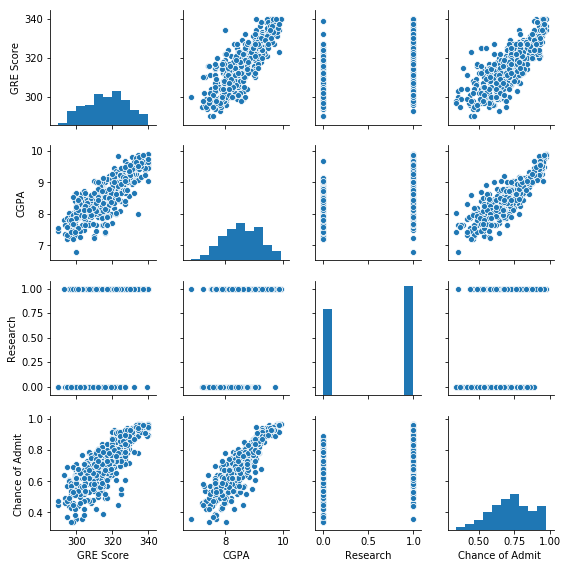

In [45]:
sns.pairplot(admission_data, diag_kind = 'hist', height=2)

plt.show()

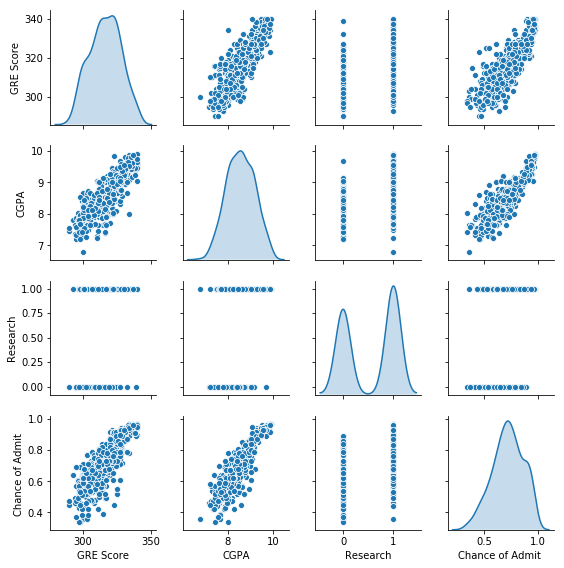

In [46]:
sns.pairplot(admission_data, diag_kind ='kde', height=2)

plt.show()

##### plotting with hue = University Rating

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


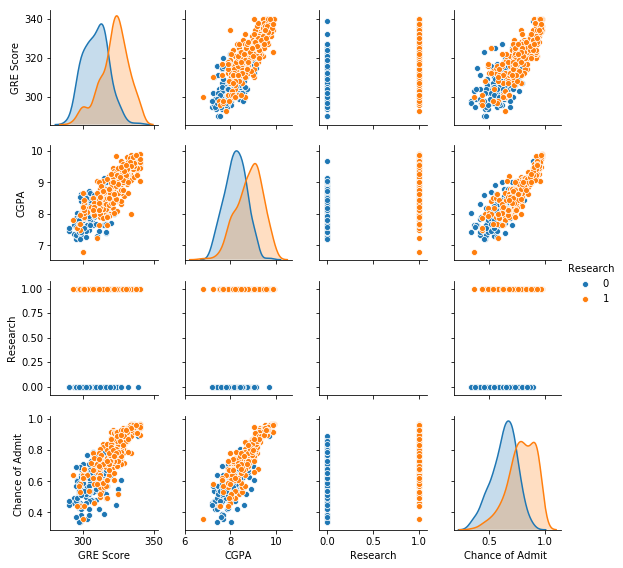

In [49]:
sns.pairplot(admission_data, hue='Research', diag_kind = 'kde', height=2)

plt.show()

### PairGrid using Iris Dataset

https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid

In [50]:
iris_data = sns.load_dataset('iris')

iris_data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
58,6.6,2.9,4.6,1.3,versicolor
50,7.0,3.2,4.7,1.4,versicolor
72,6.3,2.5,4.9,1.5,versicolor
45,4.8,3.0,1.4,0.3,setosa
85,6.0,3.4,4.5,1.6,versicolor
80,5.5,2.4,3.8,1.1,versicolor
109,7.2,3.6,6.1,2.5,virginica
120,6.9,3.2,5.7,2.3,virginica
128,6.4,2.8,5.6,2.1,virginica
4,5.0,3.6,1.4,0.2,setosa


##### Plotting a scatterplot for each pairwise relationship

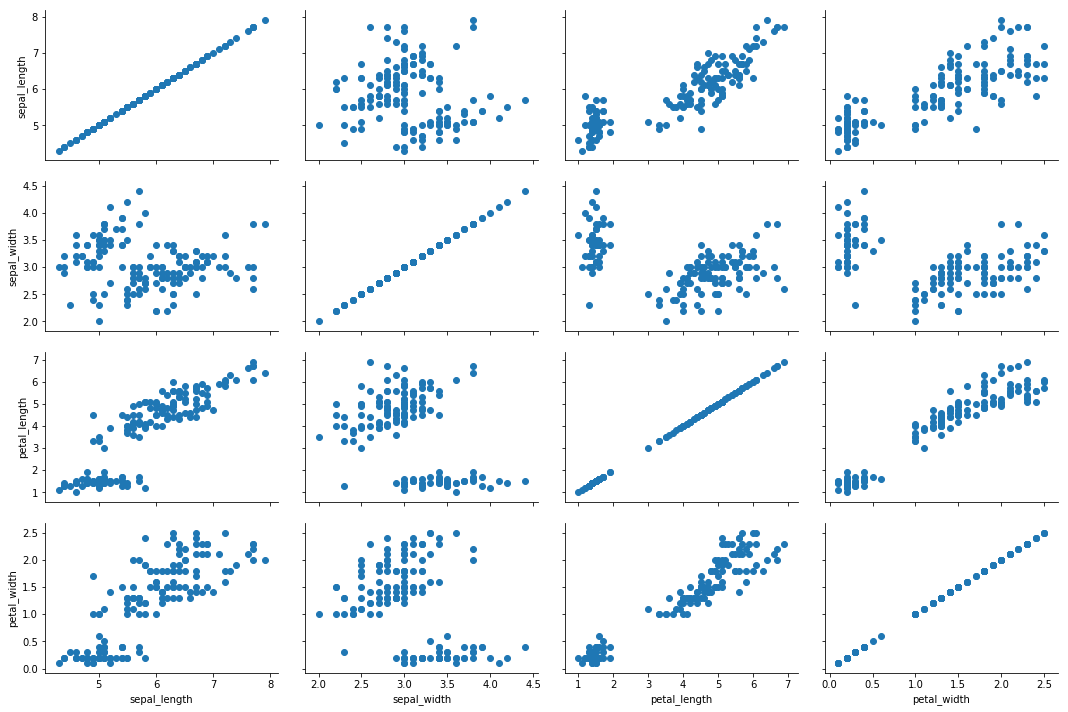

In [51]:
grid = sns.PairGrid(iris_data, aspect=1.5)

grid.map(plt.scatter)

plt.show()

##### plotting a subset of variables

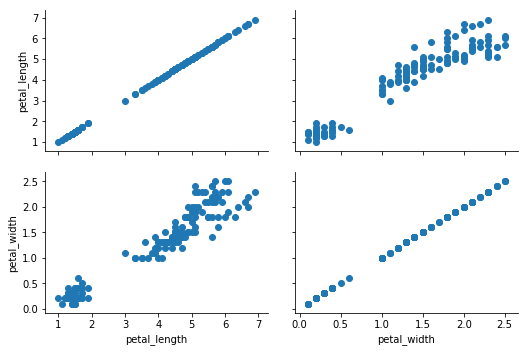

In [52]:
grid = sns.PairGrid(iris_data, vars=['petal_length', 'petal_width'], aspect=1.5)

grid.map(plt.scatter)

plt.show()

##### Plotting a univariate distribution on the diagonal

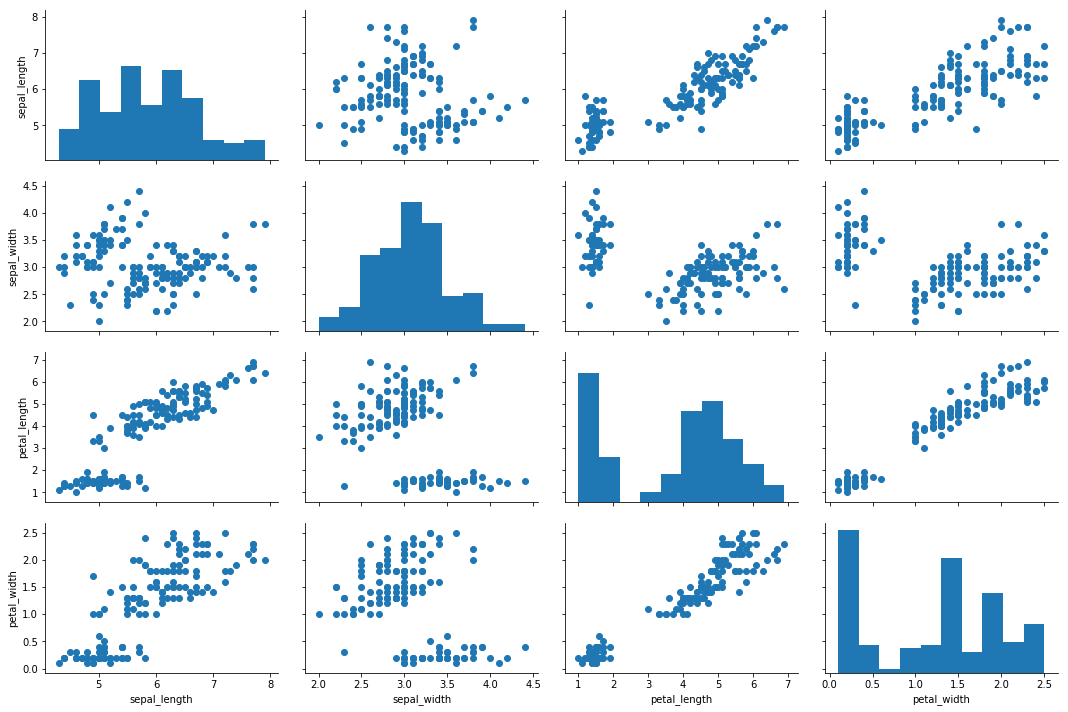

In [53]:
grid = sns.PairGrid(iris_data, aspect=1.5)

grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter)

plt.show()

##### Color the datapoints using a categorical variable species

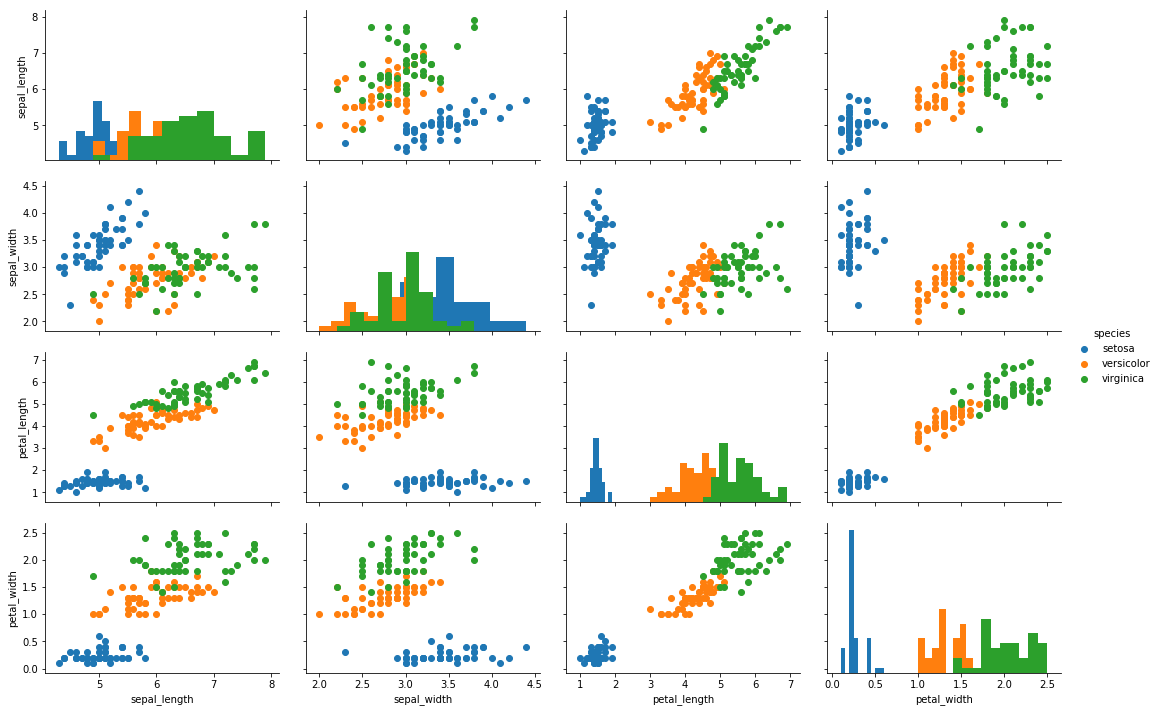

In [54]:
grid = sns.PairGrid(iris_data, hue='species', aspect=1.5)

grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter)
grid.add_legend()

plt.show()

##### Use different colors and markers for each categorical level

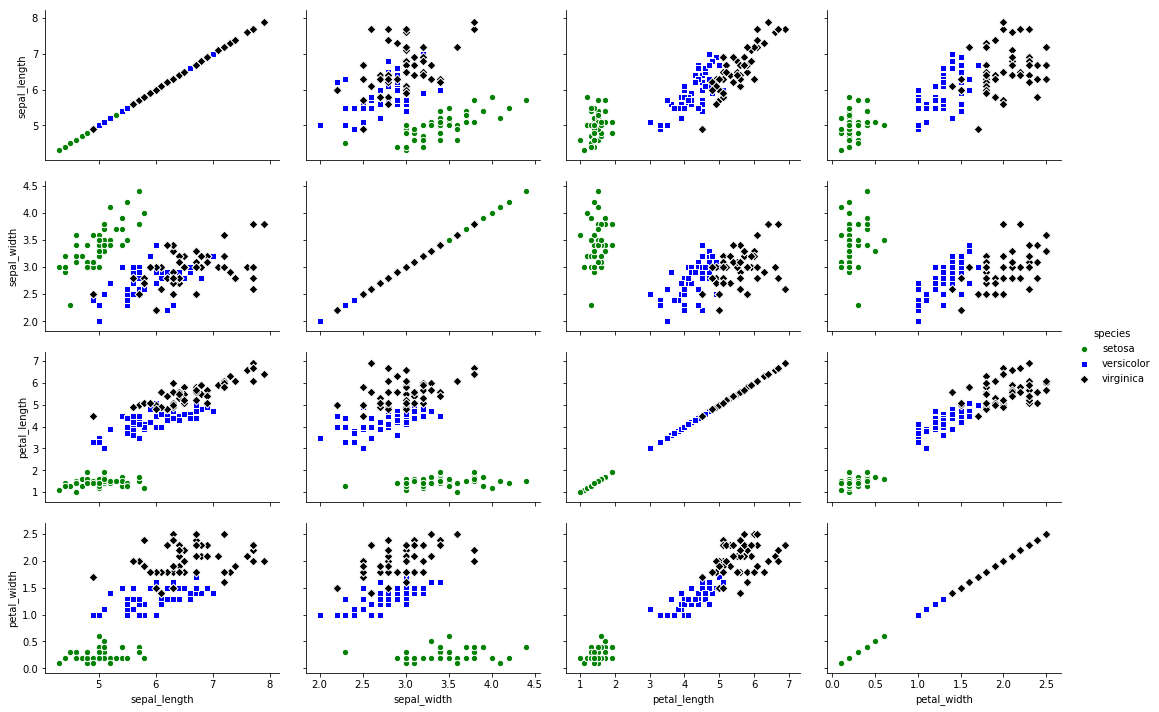

In [55]:
grid = sns.PairGrid(iris_data, hue='species', palette={'g', 'b', 'k'},
                   hue_kws={"marker": ["o", "s", "D"]}, aspect=1.5)

grid.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
grid.add_legend()

plt.show()

##### Use different functions on the upper and lower triangles

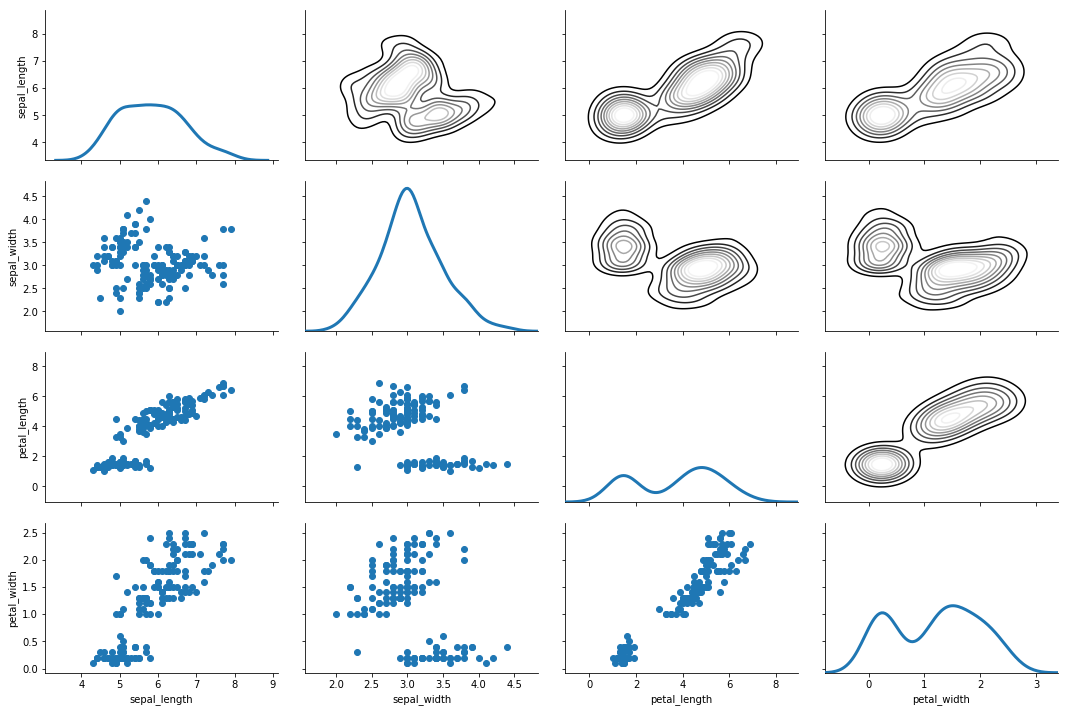

In [56]:
grid = sns.PairGrid(iris_data, aspect=1.5)

grid.map_lower(plt.scatter)
grid.map_diag(sns.kdeplot, lw=3, legend=False)
grid.map_upper(sns.kdeplot, cmap="Greys_r")

plt.show()